In [1]:
%matplotlib inline
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt
import sys 
sys.path.append("..") 
import utils
import matplotlib.ticker as mtick
plt.rcParams["font.family"] = "Gill Sans"

In [2]:
kat = 10
carbon_intensity  = 100
# i3 c5n  c5 m5zn
server_pairs = [['i3','m5zn'],['c5','m5zn']]
cold_start = False
apps = ['video','bfs-1000k','dna']

In [3]:
kat_carbon = []
st_carbon = []
st = []
for app in apps:
    for server_pair in server_pairs:
        for server in server_pair:
            if cold_start:
                st.append(utils.get_st(app, server)[0])
            else:
                st.append(utils.get_st(app, server)[1])
for app in apps:
    for server_pair in server_pairs:
        a,b =utils.compute_exe(app, server_pair,carbon_intensity)
        kat_c_1 = utils.compute_kat(app, server_pair[0], kat, carbon_intensity)
        kat_c_2 = utils.compute_kat(app, server_pair[1], kat, carbon_intensity)
        if cold_start:
            st_carbon.append(a[0])
            st_carbon.append(a[1])
        else:
            st_carbon.append(b[0])
            st_carbon.append(b[1])
        kat_carbon.append(kat_c_1)
        kat_carbon.append(kat_c_2)
# st

feat NOT subset; don't know how to subset; dropped
fond NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


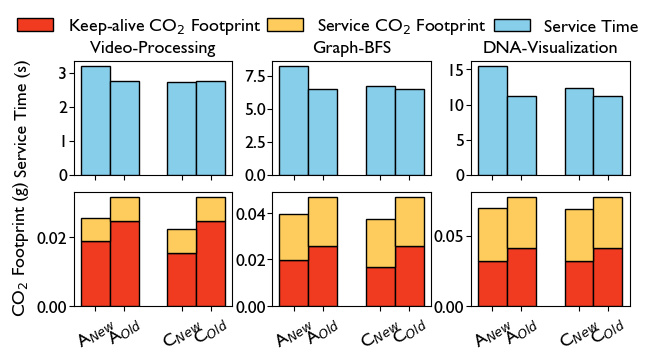

In [4]:
fig, axs = plt.subplots(nrows=2, ncols=len(apps), gridspec_kw={'hspace': 0.15, 'wspace': 0.25, 'bottom': -0.1, 
                    'top': 0.6, 'right':0.995, 'left':0.3}, figsize=(8,3.5),sharex=True)
x = [0.25,0.5,1,1.25]
width = 0.25
offset = [0-width,0+width]
LABEL =["A$_{New}$","A$_{Old}$", "C$_{New}$","C$_{Old}$"]
TITLES = ["Video-Processing", "Graph-BFS","DNA-Visualization"]
LABELS=['Keep-alive CO$_2$ Footprint', 'Service CO$_2$ Footprint','Service Time']
for i, ax in enumerate(axs[0]):
    ax.bar(x, st[len(LABEL)*i:len(LABEL)*(i+1)], width, color = 'skyblue',zorder=3, edgecolor='black', linewidth=1)
    ax.set_title(TITLES[i], fontsize=13)
    ax.set_xticks(x)
    ax.tick_params(axis='both', which='major', pad=1, labelsize=13)
for i, ax in enumerate(axs[1]):
    ax.tick_params(axis='both', which='major', pad=1, labelsize=13)
    data1 = kat_carbon[len(LABEL)*i:len(LABEL)*(i+1)]
    data2 = st_carbon[len(LABEL)*i:len(LABEL)*(i+1)]
    ax.bar(x, data1, width, zorder=3, edgecolor='black', color='#f03b20',linewidth=1)
    ax.bar(x, data2,width, zorder=3,color='#fecc5c',edgecolor='black', bottom=data1)
axs[0,0].set_ylabel('Service Time (s)', fontsize=13, labelpad=20)
axs[0,0].legend(loc=(2.6,1.16), frameon = False ,ncol=2,labels=["Service Time"],fontsize=13)
axs[1,0].set_ylabel('CO$_2$ Footprint (g)',fontsize=13)
axs[1,0].legend(loc=(-0.4,2.3), frameon = False ,ncol=3,labels=LABELS,fontsize=13,columnspacing=0.3)
for j in range(3):
    axs[1,j].set_xticks(x, LABEL, rotation=35, fontsize=13)#, va='center')
axs[0,0].set_yticks(np.arange(0, 4, 1))
axs[0,1].set_yticks(np.arange(0, 8, 2.5))
axs[0,2].set_yticks(np.arange(0, 20, 5))
plt.savefig("motiv2.pdf",bbox_inches='tight')